In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['message_type']=encoder.fit_transform(df['target'])

df['message_type'].sample(5)




2281    0
2081    0
263     1
692     0
481     0
Name: message_type, dtype: int64

In [ ]:
df[df['message_type']==1]

,target,text,message_type
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
df.isnull().sum()
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates()

In [ ]:
# Exlporatory Data Analysis


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

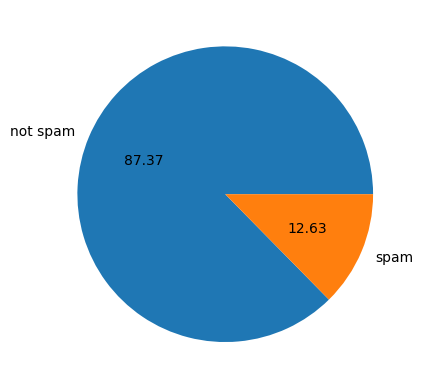

In [ ]:
df['message_type'].value_counts()
plt.pie(df['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# for number of characters:


In [ ]:
# natural language tool kid
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['target'].apply(len)
df.head()

,target,text,message_type,num_characters,num_words,num_sentencs
0,ham,"Go until jurong point, crazy.. Available only ...",0,3,1,1
1,ham,Ok lar... Joking wif u oni...,0,3,1,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,4,1,1
3,ham,U dun say so early hor... U c already then say...,0,3,1,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,3,1,1


In [ ]:
from nltk.tokenize import word_tokenize
df['target'].apply(lambda x: nltk.word_tokenize(x))

0        [ham]
1        [ham]
2       [spam]
3        [ham]
4        [ham]
         ...  
5567    [spam]
5568     [ham]
5569     [ham]
5570     [ham]
5571     [ham]
Name: target, Length: 5169, dtype: object

In [ ]:
df['num_words']=df['target'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,message_type,num_characters,num_words
249,spam,Congratulations ur awarded 500 of CD vouchers ...,1,4,1
2229,ham,haha but no money leh... Later got to go for t...,0,3,1
5451,ham,Just sing HU. I think its also important to fi...,0,3,1
2660,ham,Want to finally have lunch today?,0,3,1
3334,ham,"Sorry, got a late start, we're on the way",0,3,1


In [ ]:
df['num_sentencs']=df['target'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
# for Ham messages:

In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentencs']].describe()

,num_characters,num_words,num_sentencs
count,4516.0,4516.0,4516.0
mean,3.0,1.0,1.0
std,0.0,0.0,0.0
min,3.0,1.0,1.0
25%,3.0,1.0,1.0
50%,3.0,1.0,1.0
75%,3.0,1.0,1.0
max,3.0,1.0,1.0


In [ ]:
# spam messages

In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentencs']].describe()

,num_characters,num_words,num_sentencs
count,653.0,653.0,653.0
mean,4.0,1.0,1.0
std,0.0,0.0,0.0
min,4.0,1.0,1.0
25%,4.0,1.0,1.0
50%,4.0,1.0,1.0
75%,4.0,1.0,1.0
max,4.0,1.0,1.0


In [ ]:
# for characters

<Axes: xlabel='num_characters', ylabel='Count'>

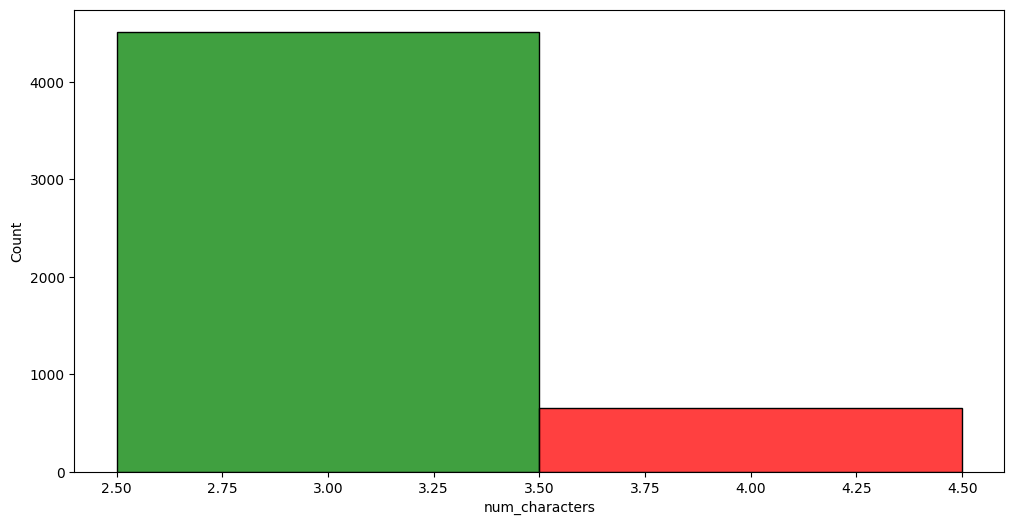

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color='red')

In [ ]:
# for words

<Axes: xlabel='num_words', ylabel='Count'>

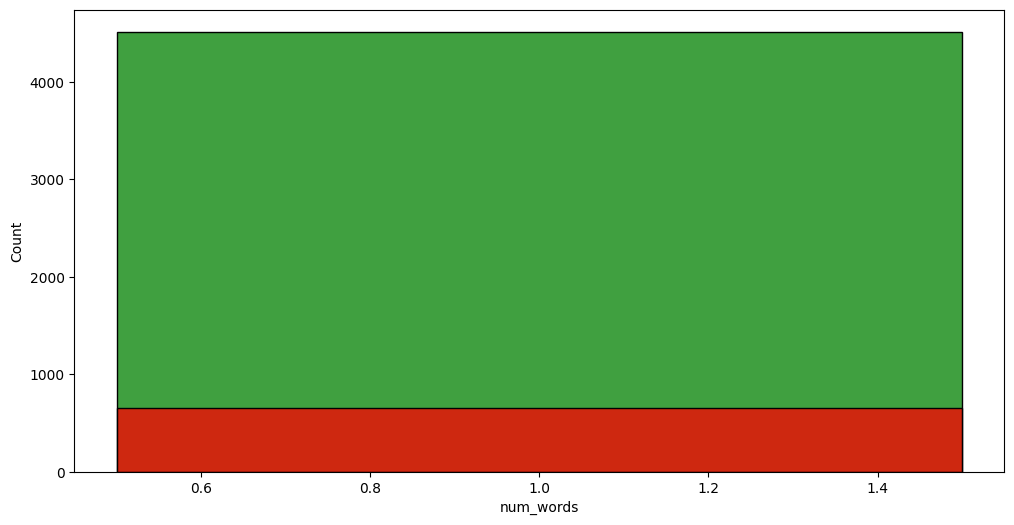

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

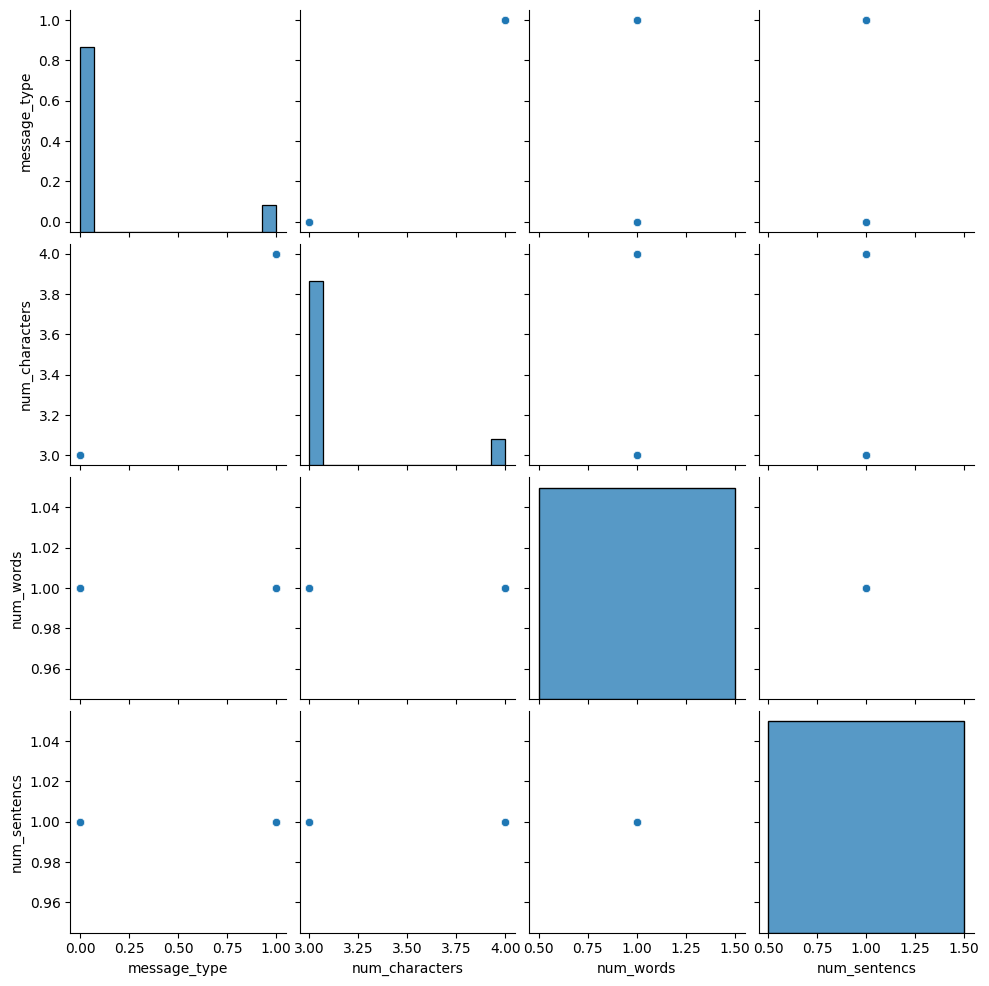

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [ ]:
# create LabelEncoder object
le=LabelEncoder()

In [ ]:

df['target']=le.fit_transform(df['target'])


In [ ]:
from tkinter.constants import Y
# Split your data into featurse(x) and target variable(y)
X,y=df.drop('target',axis=1),df['target']

In [ ]:
#split data into training and testing sets